In [1]:
!wget https://raw.githubusercontent.com/prakriti1221/Crop/main/Crop_recommendation.csv

--2023-04-12 14:27:41--  https://raw.githubusercontent.com/prakriti1221/Crop/main/Crop_recommendation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150034 (147K) [text/plain]
Saving to: ‘Crop_recommendation.csv’

Crop_recommendation 100%[===================>] 146.52K  --.-KB/s    in 0.004s  

2023-04-12 14:27:42 (38.5 MB/s) - ‘Crop_recommendation.csv’ saved [150034/150034]



In [2]:
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from IPython import get_ipython
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/Crop_recommendation.csv")

In [4]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
data.shape

(2200, 8)

In [7]:
crop_types = {
    "apple": 0,
    "banana": 1,
    "blackgram": 2,
    "chickpea": 3,
    "coconut": 4,
    "coffee": 5,
    "cotton": 6,
    "grapes": 7,
    "jute": 8,
    "kidneybeans": 9,
    "lentil": 10,
    "maize": 11,
    "mango": 12,
    "mothbeans": 13,
    "mungbean": 14,
    "muskmelon": 15,
    "orange": 16,
    "papaya": 17,
    "pigeonpeas": 18,
    "pomegranate": 19,
    "rice": 20,
    "watermelon": 21
}

In [8]:
data =data.replace({"label": crop_types})

In [9]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [12]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [13]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [14]:
data['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [15]:
data['label'].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64

In [16]:
crop_summary = pd.pivot_table(data,index=['label'],aggfunc='mean')

In [17]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
0,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
1,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
5,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
6,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
7,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
8,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [18]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [19]:
import plotly.express as px

In [20]:
#checking and treating outliers in each column

In [21]:
fig = px.box(data, y="N", points="all")
fig.show()

In [22]:
fig = px.box(data, y="P", points="all")
fig.show()

In [23]:
fig = px.box(data, y="K", points="all")
fig.show()

In [24]:
fig = px.box(data, y="temperature", points="all")
fig.show()

In [25]:
fig = px.box(data, y="humidity", points="all")
fig.show()

In [26]:
fig = px.box(data, y="rainfall", points="all")
fig.show()

In [27]:
fig = px.box(data, y="ph", points="all")
fig.show()

In [28]:
#detecting and removing outliers

In [29]:
df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()

''' Detection '''
#IQR
Q1 = np.percentile(df_boston['rainfall'], 25,
                          interpolation = 'midpoint')

Q3 = np.percentile(df_boston['rainfall'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df_boston.shape)

#Upper bound
upper = np.where(df_boston['rainfall'] >= (Q3+1.5*IQR))
#Lower bound
lower = np.where(df_boston['rainfall'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)

print("New Shape: ", df_boston.shape)

Old Shape:  (2200, 8)
New Shape:  (2101, 8)


In [30]:
data = df_boston

In [31]:
df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()

''' Detection '''
#IQR
Q1 = np.percentile(df_boston['rainfall'], 25,
                          interpolation = 'midpoint')

Q3 = np.percentile(df_boston['rainfall'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df_boston.shape)

#Upper bound
upper = np.where(df_boston['K'] >= (Q3+1.5*IQR))
#Lower bound
lower = np.where(df_boston['K'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)

print("New Shape: ", df_boston.shape)

Old Shape:  (2101, 8)
New Shape:  (1979, 8)


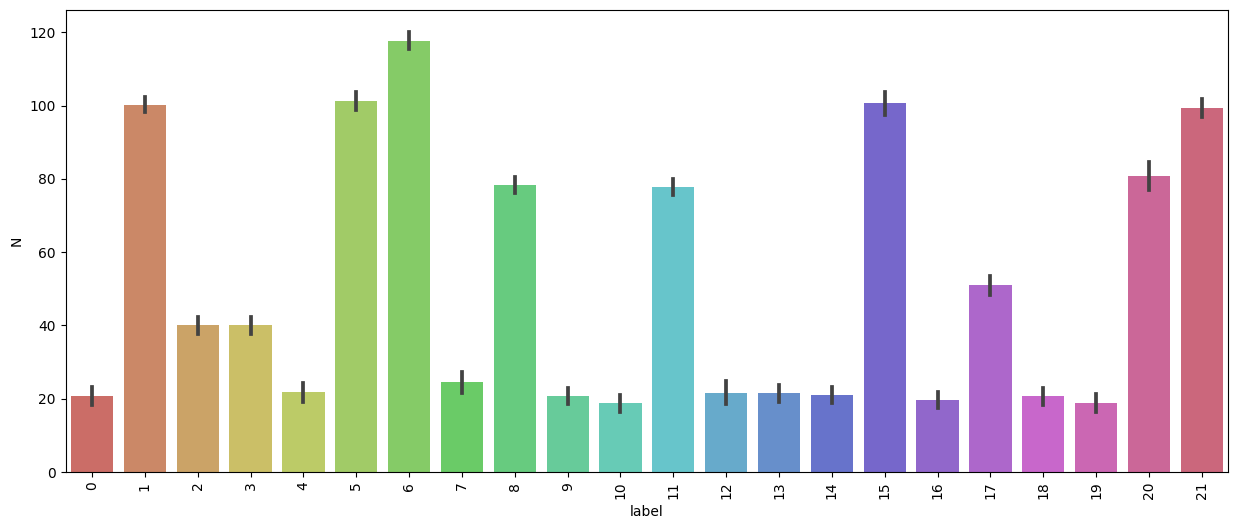

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(y='N', x='label', data=data, palette='hls')
plt.xticks(rotation=90)
plt.show()

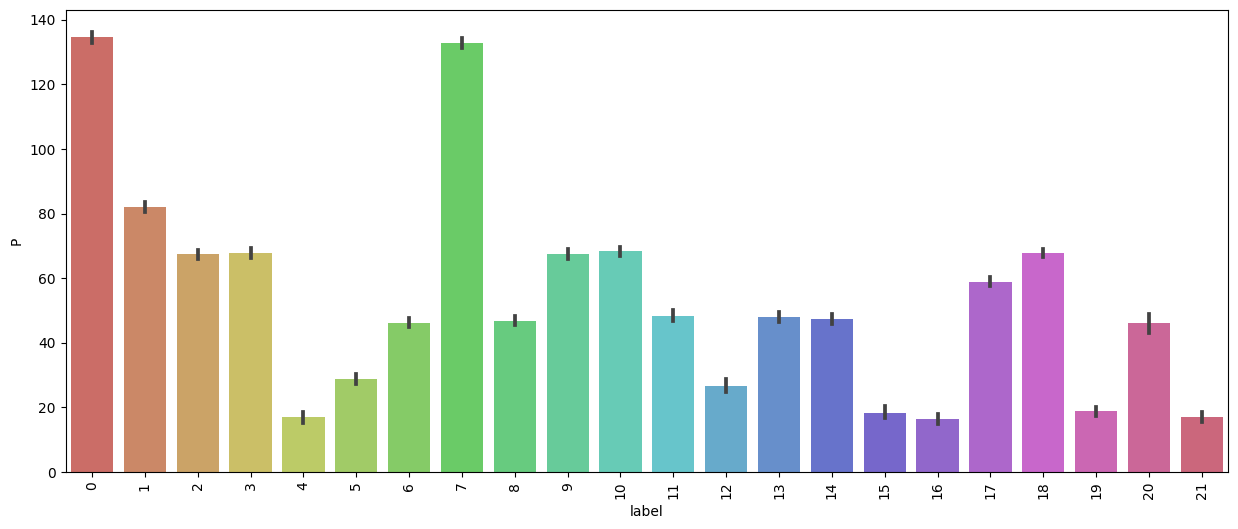

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(y='P', x='label', data=data, palette='hls')
plt.xticks(rotation=90)
plt.show()

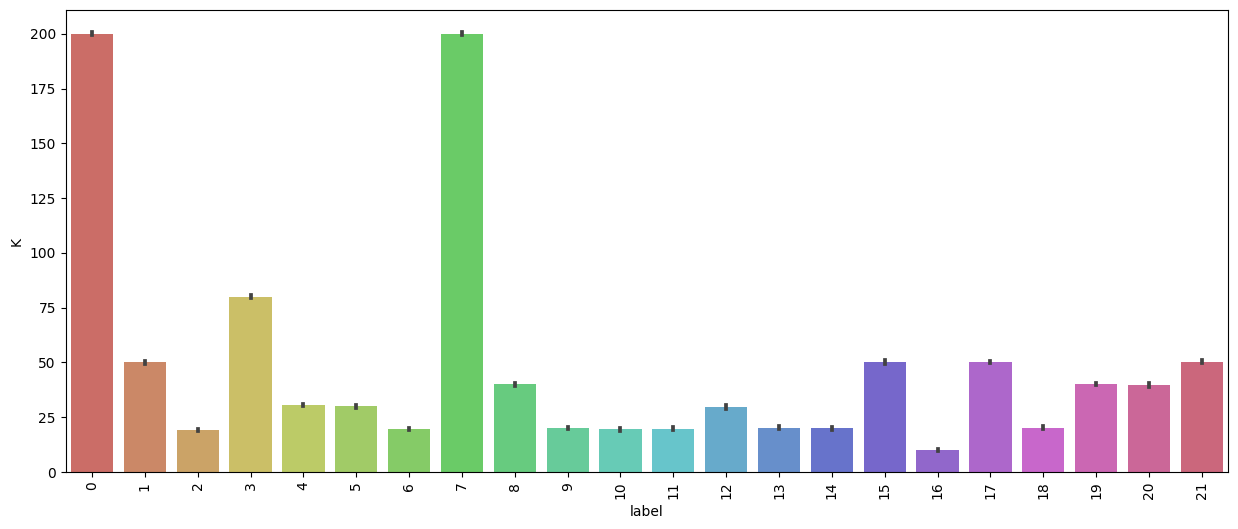

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(y='K', x='label', data=data, palette='hls')
plt.xticks(rotation=90)
plt.show()

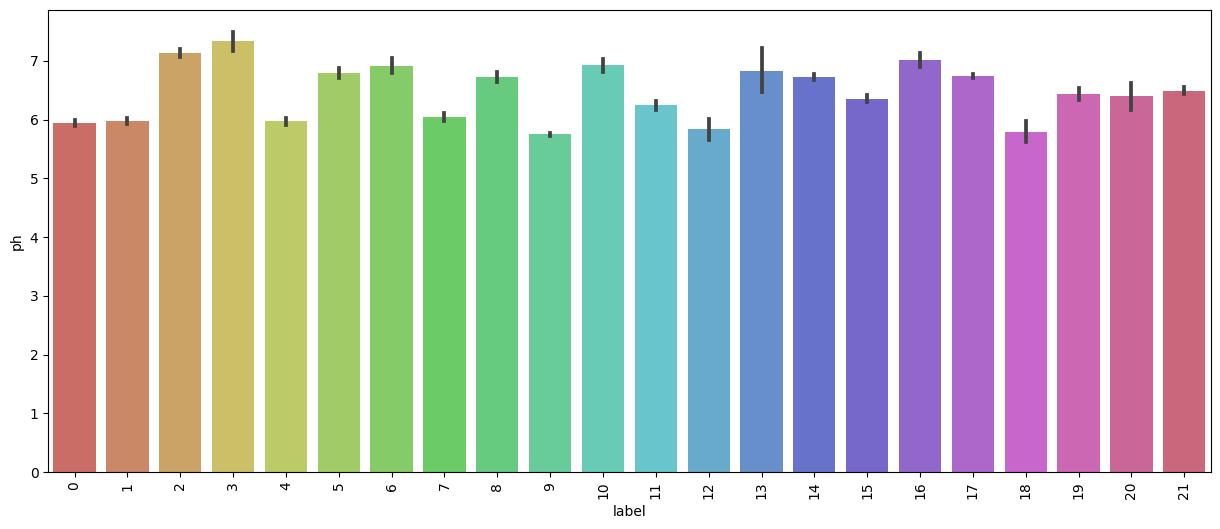

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(y='ph', x='label', data=data, palette='hls')
plt.xticks(rotation=90)
plt.show()

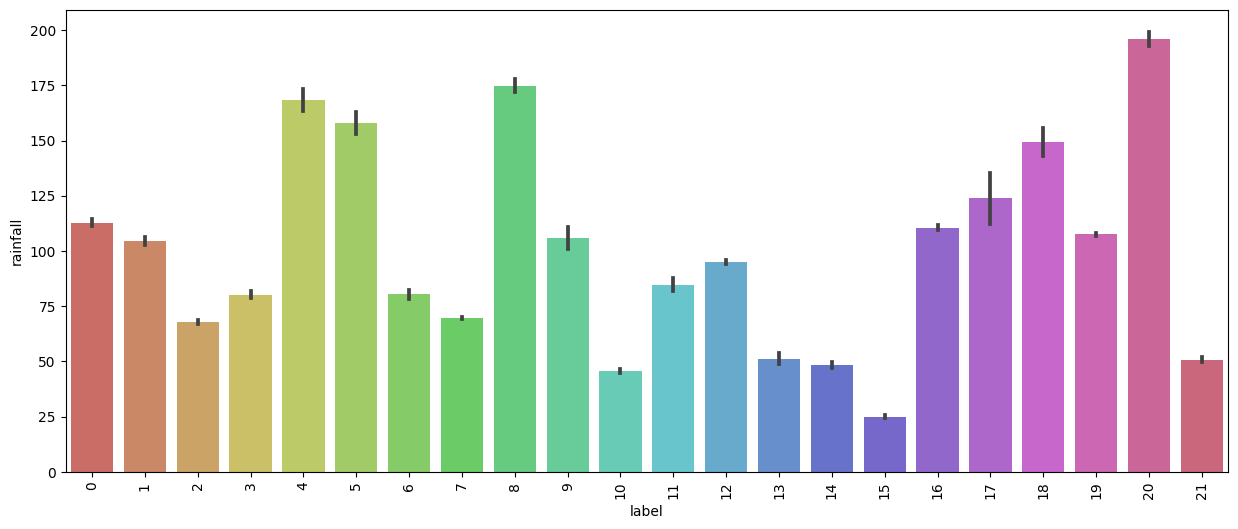

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(y='rainfall', x='label', data=data, palette='hls')
plt.xticks(rotation=90)
plt.show()

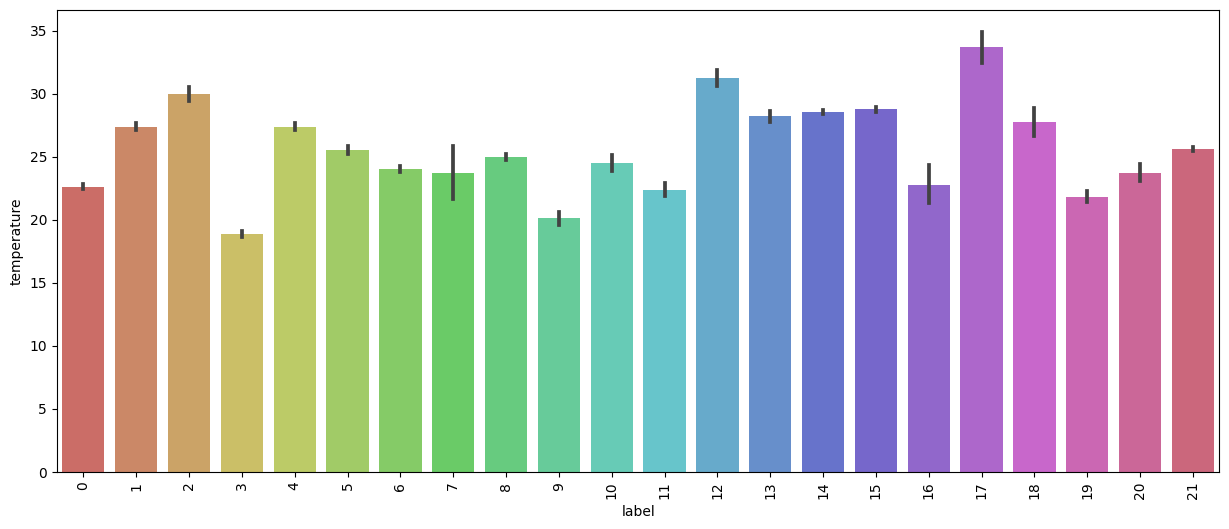

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(y='temperature', x='label', data=data, palette='hls')
plt.xticks(rotation=90)
plt.show()

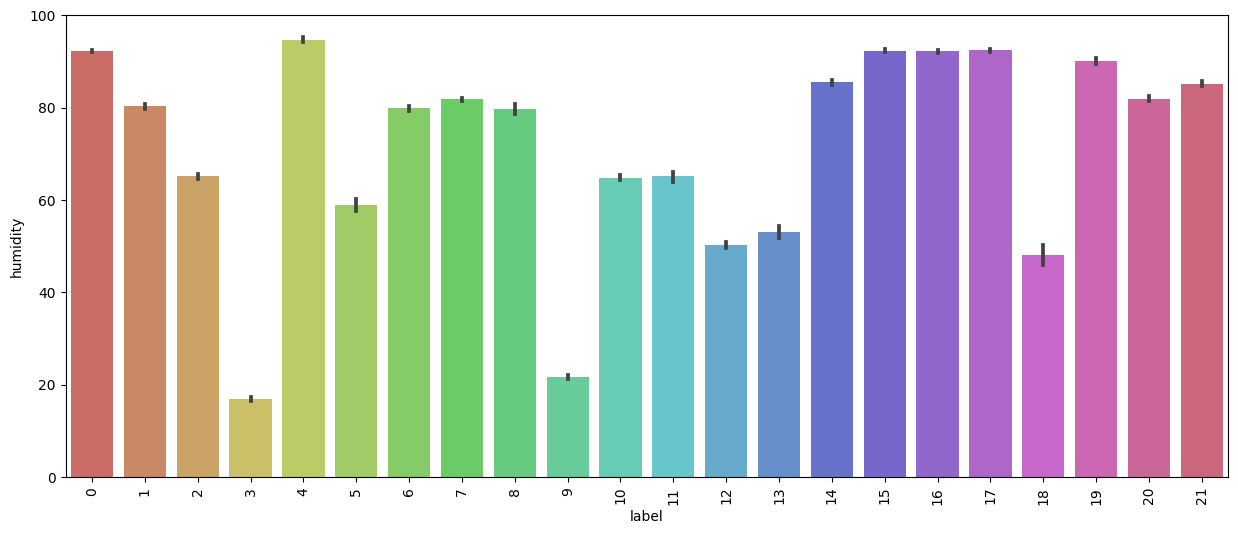

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(y='humidity', x='label', data=data, palette='hls')
plt.xticks(rotation=90)
plt.show()

In [39]:
#pip install plotly

In [40]:
crop_summary_new = data.copy()

In [41]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [42]:
figl = px.bar(crop_summary_new, x='label', y='N')
figl.show()

In [43]:
figl = px.bar(crop_summary_new, x='label', y='P')
figl.show()

In [44]:
figl = px.bar(crop_summary_new, x='label', y='K')
figl.show()

In [45]:
import random
from IPython.core.display import update_display

In [46]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.207076,-0.116513,0.043352,0.167748,0.080837,0.043393,-0.111554
P,-0.207076,1.000000,0.714777,-0.096992,-0.147775,-0.149549,-0.079221,-0.499945
K,-0.116513,0.714777,1.000000,-0.158878,0.171878,-0.159920,-0.030445,-0.338956
temperature,0.043352,-0.096992,-0.158878,1.000000,0.232691,-0.003939,-0.021547,0.113064
humidity,0.167748,-0.147775,0.171878,0.232691,1.000000,-0.013005,0.054436,0.191589
ph,0.080837,-0.149549,-0.159920,-0.003939,-0.013005,1.000000,-0.144905,-0.022820
rainfall,0.043393,-0.079221,-0.030445,-0.021547,0.054436,-0.144905,1.000000,-0.097874
label,-0.111554,-0.499945,-0.338956,0.113064,0.191589,-0.022820,-0.097874,1.000000


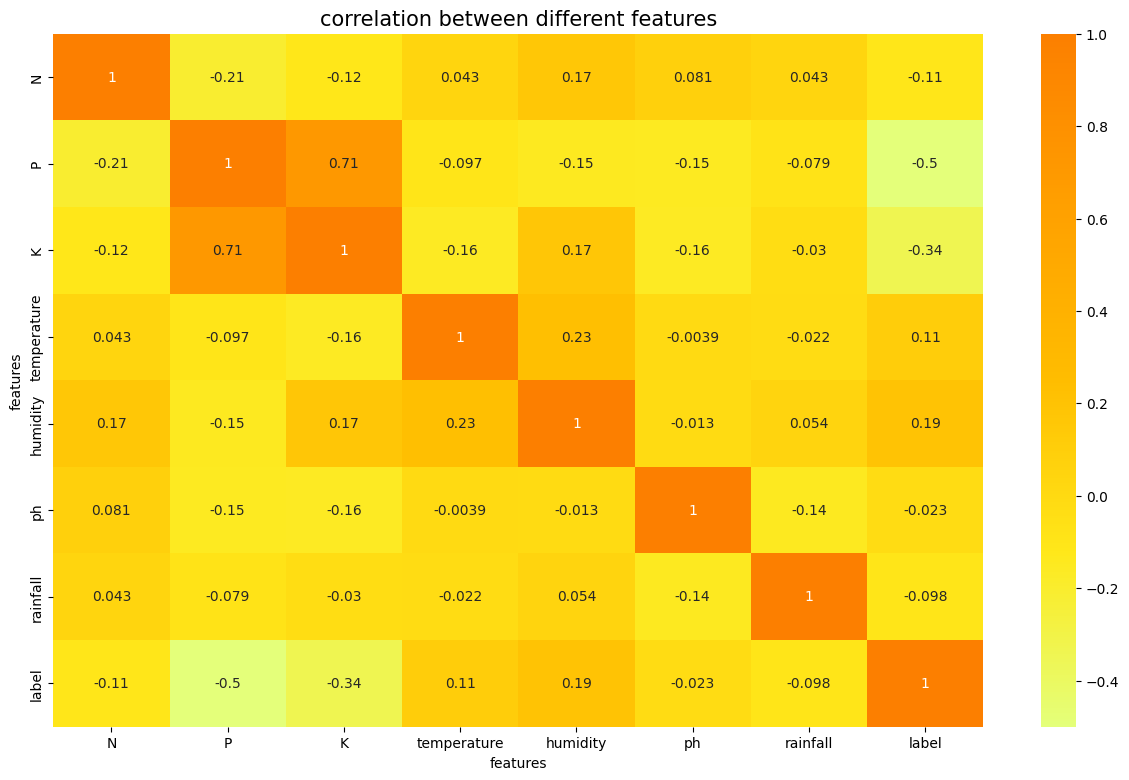

In [47]:
fig,ax=plt.subplots(1,1,figsize=(15,9))
sns.heatmap(data.corr(), annot=True, cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('correlation between different features', fontsize=15, c='black')
plt.show()


In [48]:
features = data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = data['label']
labels = data['label']

In [49]:
acc = []
model = []

Splitting into train and test data

In [50]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,
                                                test_size = 0.2, random_state=2)

In [51]:
Ytest

1651    16
954     19
1909     6
1016     1
549     13
        ..
1671    16
401     18
789      2
1676    16
1695    16
Name: label, Length: 396, dtype: int64

In [52]:
crop_types = ('apple','banana','blackgram','chickpea','coconut','coffee','cotton','grapes','jute','kidneybeans','lentil',
                'maize','mango','mothbeans','mungbean','muskmelon','orange','papaya','pigeonpeas','pomegranate','rice','watermelon')
crop = pd.DataFrame(crop_types, columns=['Crop_Types'])
# converting type of columns to 'category'
crop['Crop_Types'] = crop['Crop_Types'].astype('category')
# Assigning numerical values and storing in another column
crop['Crop_Types_cat'] = crop['Crop_Types'].cat.codes


In [53]:
Ytrain.replace({"": dict})

224      3
1220     7
1329    21
1690    16
1927     6
        ..
1755    17
1819     4
561     13
595     13
1325    21
Name: label, Length: 1583, dtype: int64

CLASSIFICATION **ALGORITHM**

**Logistic Regression**

In [54]:
LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain, Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9595959595959596
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       0.79      0.94      0.86        16
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        21
           6       0.86      0.95      0.90        20
           7       1.00      1.00      1.00        14
           8       1.00      0.94      0.97        18
           9       1.00      1.00      1.00        20
          10       0.95      0.91      0.93        22
          11       0.95      0.86      0.90        21
          12       1.00      1.00      1.00         3
          13       0.86      0.76      0.81        25
          14       1.00      0.96      0.98        26
          15       1.00      1.00      1.00        14
          16       1.00   

In [55]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg, features, target, cv=5)
score

array([0.93939394, 0.95707071, 0.95959596, 0.96212121, 0.94936709])

Making prediction

In [56]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = LogReg.predict(data)
print(prediction)
                            

[8]


In [57]:
data = np.array([[43, 45, 60, 21, 60.3, 7.0, 200.9]])
prediction = LogReg.predict(data)
print(prediction)

[17]


**LOGISTIC** **REGRESSION** **FROM** **SCRATCH** 

In [58]:
class LogisticRegression:
    
    # defining parameters such as learning rate, number ot iterations, whether to include intercept, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, Xtrain,Ytrain, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    def __b_intercept(self, Xtrain):
        # initially we set it as all 1's
        intercept = np.ones((Xtrain.shape[0], 1))
        # then we concatinate them to the value of X, we don't add we just append them at the end.
        return np.concatenate((intercept, Xtrain), axis=1)
    
    def __softmax_function(self, z):
        # this is our actual sigmoid function which predicts our yp
        return np.exp(z) / np.sum(np.exp(z))
    
    def __loss(self, yp, Ytrain):
        # this is the loss function which we use to minimize the error of our model
        print(f"Loss Error{(-Ytrain * np.log(yp) - (1 - Ytrain) * np.log(1 - yp)).mean()}")
        return (-Ytrain * np.log(yp) - (1 - Ytrain) * np.log(1 - yp)).mean()
    
    # this is the function which trains our model.
    def fit(self, Xtrain, Ytrain):
        
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(Xtrain)
        
        # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
        self.W = np.zeros(Xtrain.shape[1])
        
        # this for loop runs for the number of iterations provided
        for i in range(self.num_iterations):
            
            # this is our W * Xi
            z = np.dot(Xtrain, self.W)
            
            # this is where we predict the values of Y based on W and Xi
            yp = self.__softmax_function(z)

             # this is where the gradient is calculated form the error generated by our model
            gradient = np.dot(Xtrain.T, (yp - Ytrain)) / Ytrain.size
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
            self.W -= self.learning_rate * gradient
            
            # this is our new W * Xi
            z = np.dot(Xtrain, self.W)
            yp = self.__softmax_function(z)
            
            # this is where the loss is calculated
            loss = self.__loss(yp, Ytrain)
            
            # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # this is where we predict the probability values based on out generated W values out of all those iterations.
    def predict_prob(self, Xtrain):
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            Xtrain = self.__b_intercept(Xtrain)
        
        # this is the final prediction that is generated based on the values learned.
        return self.__softmax_function(np.dot(Xtrain, self.W))
    
    # this is where we predict the actual values 0 or 1 using round. anything less than 0.5 = 0 or more than 0.5 is 1
    def predict(self, Xtest):
        return self.predict_prob(Xtest).round()

In [59]:
# model = LogisticRegression(Xtrain, Ytrain, learning_rate=0.0001, num_iterations=15)
# model.fit(Xtrain, Ytrain)

In [60]:
def softmax_function(z):
  return np.exp(z) / np.sum(np.exp(z))

In [61]:
def b_intercept(Xtrain):
  # initially we set it as all 1's
  intercept = np.ones((Xtrain.shape[0], 1))
  # then we concatinate them to the value of X, we don't add we just append them at the end.
  return np.concatenate((intercept, Xtrain), axis=1)

In [62]:
Xtrain =  b_intercept(Xtrain)

In [63]:
z = softmax_function(b_intercept(Xtrain))

In [64]:
def fit(Xtrain, Ytrain, learning_rate, num_iter):
  # as said if we want our intercept term to be added we use fit_intercept=True
  X = b_intercept(Xtrain)
        
  # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
  W = np.zeros(Xtrain.shape[1])
        
  # this for loop runs for the number of iterations provided
  for i in range(num_iter):
            
    # this is our W * Xi
    z = np.dot(Xtrain, W)
            
    # this is where we predict the values of Y based on W and Xi
    yp = softmax_function(z)

    # this is where the gradient is calculated form the error generated by our model
    gradient = np.dot(Xtrain.T, (yp - Ytrain)) / Ytrain.size
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
    W -= learning_rate * gradient
            
            # this is our new W * Xi
    z = np.dot(Xtrain, W)
    yp = softmax_function(z)
            
            # this is where the loss is calculated
    print(f"For{i}")
    loss1 = loss(yp, Ytrain)
            
    # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
    print(f'loss: {loss1} \t')
    
  return W

In [65]:
def loss(yp, Ytrain):
  # this is the loss function which we use to minimize the error of our model
  return (-Ytrain * np.log(yp) - (1 - Ytrain) * np.log(1 - yp)).mean()

In [66]:
def predict_prob(X, W):
  X = b_intercept(X)
        
    # this is the final prediction that is generated based on the values learned.
  W = W.reshape(-1,1)
  return softmax_function(np.dot(X, W))
    
    # this is where we predict the actual values 0 or 1 using round. anything less than 0.5 = 0 or more than 0.5 is 1
def predict(Xtest, W):
  return predict_prob(Xtest, W)

In [67]:
W = fit(Xtrain, Ytrain, 0.0000005, 1)

For0
loss: 74.34546295128567 	


In [68]:
W.shape

(8,)

In [69]:
prediction = predict(Xtest, W)

In [70]:
len(prediction)

396

In [71]:
np.argmax(prediction)

278

### Return Array of probabilities